In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,48.141193,2.440934,10.587487,-4.514148,15.341971
1,51.650202,16.292479,11.505585,20.649871,18.329474
2,59.440508,5.426689,11.181883,12.551974,15.099787
3,32.783149,2.050844,11.204916,23.044138,21.545922
4,59.485871,1.050353,8.819611,7.013264,14.260209


<AxesSubplot:ylabel='Density'>

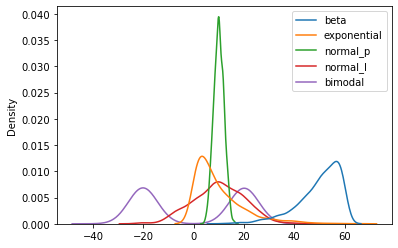

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.932382,9.895953,9.978321,9.968508,-0.079133
std,8.515799,9.790778,2.016774,10.190777,20.294022
min,11.797072,0.003762,4.326161,-21.877500,-33.021358
25%,45.418452,2.704139,8.571558,2.897883,-20.071658
50%,51.849639,6.764367,9.943308,9.969148,0.257219
75%,56.649865,13.806814,11.420814,17.167091,19.964535
max,59.998880,65.247468,16.081641,43.152969,27.351365


<AxesSubplot:ylabel='Density'>

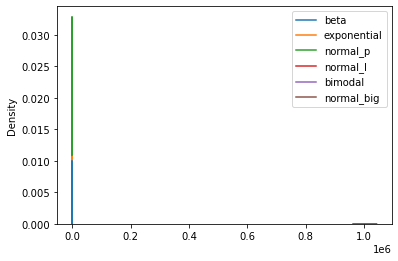

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

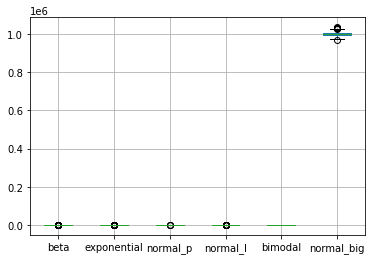

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.330185,-0.389405,0.226087,-1.015004,0.376778,-0.010937
1,-0.017757,0.858182,0.548310,0.748515,0.451398,-0.193245
2,0.675861,-0.120482,0.434701,0.181007,0.370729,-0.167052
3,-1.697604,-0.424539,0.442785,0.916308,0.531736,1.070444
4,0.679899,-0.514652,-0.394383,-0.207151,0.349758,0.380755


In [ ]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)